## A LYRICAL EVOLUTION: 

#### An Investigation of the Cultural Lexicon of U.S. Popular Music from 1958 - Present
---

By: Jerry Nolf, Rachel Robbins-Mayhill, Ben Smith,  & Chris Teceno    |    Codeup   |   Innis Cohort   |   June 2022  

The findings of this project are available in presentation format by clicking on the [Final Slide Presentation](https://www.canva.com/design/DAFCXoeG7z0/jNCtQkQFqyOTWS5Ckg8Xuw/view?utm_content=DAFCXoeG7z0&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton).

<img src="dataset-cover.png">

*** **WARNING**: *** 

This project contains explicit content in the form of isolated words identified through Topic Modeling as features grouped within a topic. Read with caution.

## Project Goal
This project aimed to investigate the patterns of song lyrics across decades by applying Natural Language Processing techniques including Topic Modeling and Sentiment Analysis, while using a Kaggle data set of the Billboard Top 100 Songs from 1958 - Present and lyrics pulled from the Genius.com API. We believe the lyrics of popular songs could be used for historical analysis using exploratory methods and hypothesis testing to identify changing societal trends in relationships, sexuality, and vulgarity. Furthermore, we believe we can predict the decade the song appeared on the Top 100 using features and machine learning methods.

## Project Description

Songs are powerful tokens: they can soothe, validate, ignite, confront, and educate us – among other things. Like time capsules, they are captured for eternity. The slang and language used are often indicative of the times, and you can probably recall exactly when a song was made based on what is mentioned. Arguably, music is a catalyst for societal and cultural evolution like no other art form. It has been causing controversy and societal upheaval for decades, and it seems with every generation there’s a new musical trend that has the older generations shaking their heads. 

For centuries, songs have been passed down through generations, being sung as oral histories. However, with advancements of the 20th century, technology has made the world of music a much smaller place and, thanks to cheap, widely-available audio equipment, songs are now distributed on a much larger scale, having a farther-reaching impact, and a more permanent place in history. 

This project aimed to combine the record of lyrical history and technological advancements to evaluate the changes in the societal lexicon over the last 60+ years. Using machine learning and natural language processing methodologies we investigated the topics prevalent in songs of the past, predicted the decade in which they were written, and conducted historical analysis through exploration to identify changing societal trends in relationships, sexuality, and vulgarity.

<img src='Billboard.png' width="350" height="350" align="left"/> To do this, we acquired a [Kaggle](https://www.kaggle.com/datasets/dhruvildave/billboard-the-hot-100-songs) data set of the Billboard Top 100 Songs from its inception in 1958 to present. We then utilized the [Genius.com](https://genius.com/) API and LyricGenius Library to conduct web scraping to pull the lyrics for the specified songs which became the corpus for this project. After acquiring and preparing the corpus, our team conducted time series analysis and natural language processing exploration utilizing methods such as sentiment analysis and topic modeling. We also employed multiclass classification methods to create multiple machine learning models. The end goal was to create an NLP model that accurately predicted the decade a song first appeared on the Billboard Top 100 chart, based on the words found in the lyrics of the song.

We choose the Billboard Hot 100 song list as a focus because it is the music industry standard record chart in the United States for song popularity, published weekly by Billboard magazine. It provides a window into popular culture at a given time, by providing chart rankings of songs that were trending on sales, airplay, and now streaming for that week in the United States. It is arguably the best historical record of the impact of specific popular songs over time.

## Initial Thoughts & Hypothesis

The initial hypothesis of this project was that we could use the top songs of each decade in conjunction with topic modeling and sentiment analysis to identify lyric features that would accurately predict the decade a song was on the Billboard Top 100 using machine learning. The thought behind this was that popular songs have been the historians of a unique lexicon, specific to their place in time. We believe the lyrics of popular songs could be analyzed through machine learning to identify societal trends in relationships, sexuality, and vulgarity.

## Initial Questions

The focus of this project is on identifying the decade a song first appeared on the Billboard Top 100. Below are some of the initial questions this project looked to answer throughout the Data Science Pipeline.
 
##### Data-Focused Questions
- How does sentiment within lyrics change over time?
- Is there a correlation between events in history and sentiment of lyrics?
- What topics are most prevalent across the decades?
- How do topics within lyrics change over time?
- Is there a correlation between topics and the time a song was popular?

## Key Findings

Through exploratory analysis, we discovered US popular music has undergone a major cultural shift starting in the 1990's, where: 

- overall sentiment decreased 
- lyrics became more complex 
- topics shifted towards sex, money, & violence 
- ‘love’ was replaced with ‘like’

Ultimately, our hypothesis that we could use the top songs of each decade to accurately predict the decade a song was on the Billboard Top 100 was true. Although, certain decades were predicted more accurately than others. Our best performing models were based heavily on TF/IDF with the top performing model being a Logistic Regression model with an F-1 score that was 220% over baseline

==========================================================================================================================================================

## I. ACQUIRE
To acquire the data for this project, we utilized a [Kaggle](https://www.kaggle.com/datasets/dhruvildave/billboard-the-hot-100-songs) data set of the entire listing of Billboard Top 100 Songs from its inception in 1958 to present. 

The dataset provided:
- date song was on the Billboard Top 100 
- rank of song  
- title
- artist name
- rank of song the previous week
- rank of song at its peak week
- number of weeks song was on the Top 100  

The original Kaggle dataset contained more than 300,000 entries. We selected only unique artists and songs, to ensure there were no duplicates, keeping only the earliest appearance on the chart to standardize the selections in the event of multiple appearances. Following song selection with the Kaggle dataset, we then obtained an API token to utilize the [Genius.com](https://genius.com/) API and [LyricGenius Library](https://pypi.org/project/lyricsgenius/) to conduct web scraping and pull the lyrics for the specified songs which became the corpus for this project.

### Note about imports: 
Imports for this project are added in the sections in which they are required.

In [1]:
# import for acquisition
import os
import json
import requests
import final_prepare as prepare
import final_explore as explore
import final_model as model

# import for data manipulation
import pandas as pd
import numpy as np
from typing import Dict, List, Optional, Union, cast

# import to ignore warnings
import warnings
warnings.filterwarnings('ignore')

Reading from csv...


In [2]:
# acquire data from .json saved and processed using functions found in wrangle.py
df = pd.read_csv("songs_0526.csv")
df.head()

,title,artist,date,lyrics
0,#1,Nelly,2001-10-20,#1 LyricsUh uh uh I just gotta bring it to the...
1,#9 Dream,John Lennon,1974-12-21,#9 Dream Lyrics[Verse 1] So long ago Was it in...
2,#Beautiful,Mariah Carey Featuring Miguel,2013-05-25,"#Beautiful Lyrics[Intro: Mariah Carey] Ah, ah,..."
3,#SELFIE,The Chainsmokers,2014-03-15,#SELFIE Lyrics[Verse 1] When Jason was at the ...
4,#thatPOWER,will.i.am Featuring Justin Bieber,2013-04-06,#thatPOWER Lyrics[Instrumental break] [Pre-Ch...


In [3]:
# obtain number of columns and rows for original dataframe
df.shape

(23762, 4)

#### Original Filtered DataFrame Size: 
- 23,762 rows, or documents, and 5 columns.

==========================================================================================================================================================

## II. PREPARE

After data acquisition, the dataframe was analyzed and cleaned to facilitate functional exploration and clarify variable confusion. The preparation of this data can be replicated using the 'get_data' function saved within the prepare.py file inside the [Lyrical Evolution](https://github.com/CBRJ-Lyrical-Metrics/song-lyrics-capstone) repository on GitHub. The function takes in the original acquire dataframe and returns it with the changes noted below.

**Steps Taken to Clean & Prepare Data:**

- Cleaning: 
    - Make all text lowercase
    - Normalize, encode, and decode to remove accented text and special characters
    - Expand abbreviated contractions
    - Lemmatize words to acquire base words
    - Remove stopwords
    - Convert date to DateTime format
    - Remove song part identifiers ('lyrics' 'verse', 'chorus', 'hook', 'embed')
    
---   
- Address missing values, data errors, unnecessary data, and unclear values:
    - No null values
    - Data Errors : The API returned lyrics that were not the expected song's lyrics these were handled by:
        - using regex and other string manipulation to compare the searched-for song title to the returned song title contained in the lyrics. If these did not match, the entry was removed from the dataset.
        - given more time, additional search methods within the API or alternative APIs could be used to obtain the correct lyrics for these songs
---    
- Create feature engineered columns:
    - Decade 
    - Chorus Count
    - Verse Count
    - Verse/Chorus Ratio
    - Word Count
    - Unique Words per Song
    - Unique Words per Decade
    - Bigrams
    - Trigrams
    
- Apply Natural Language Processing (NLP Methods:
    - Sentiment Analysis
    - Topic Modeling
    
---
- Split corpus into train, validate, and test samples 

### Sentiment Analysis

Natural Language Toolkit (NLTK) was used to prepare the corpus for sentiment analysis. NLTK assigns a score between -1 and +1 to each song based on whether the the sum of words and phrases in the song are considered to be positive or negative.
After scores were assigned to each song based upon the lyrical content, sentiment score ranges were divided into 5 categories: very negative, somewhat negative, nuetral, somewhat positive, and very positive. Each song was then labeled with the sentiment category by its corresponding sentiment score in preparation for exploration.

### Topic Modeling

Latent Dirichlet Allocation (or LDA) spearheaded the extraction of topics within the lyrics. This unsupervised machine learning method detected word and phrase patterns. It then clustered groups of words that could best be labeled as a topic. 20 major topics were originally produced, but 3 were overlapping in tone and were therefore manually combined with others, resulting in 17 final topics to explore. These topics will be outlined in more detail through the exploration section of this report.

<img src='final_topics.png' width="900"  align="center"/>

---

## Results of Data Preparation

In [4]:
# import for prepare
import final_prepare as prepare
import unicodedata
import re

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

from time import strftime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from collections import Counter

In [5]:
# apply the data preparation observations and tasks to clean the data using the prep_data function found in the prepare.py
df = prepare.get_data()
# view first few rows of dataframe
# obtain the number of rows and columns for the updated/cleaned dataframe 
print(df.shape)
df.head()

Reading from csv...
(23762, 23)


,title,artist,date,lyrics,raw_lyrics,decade,character_count,word_count,unique_words,unique_words_count,sentiment,sentiment_category,place_words,chorus_count,verse_count,verse_chorus_ratio,pre_chorus_count,outro_count,bridge_count,hook_count,bigrams,trigrams,topic_name
0,#1,Nelly,2001-10-20,uh uh uh got bring attention dirty better watc...,#1 LyricsUh uh uh I just gotta bring it to the...,2000,2014,363,show iii askin takin act keep flock fame yo fr...,228,0.9915,very positive,[hook] [hook] [hook],0,0,0.000000,0,0,0,3,"[('uh', 'uh'), ('uh', 'uh'), ('uh', 'got'), ('...","[('uh', 'uh', 'uh'), ('uh', 'uh', 'got'), ('uh...",sex
1,#9 Dream,John Lennon,1974-12-21,long ago dream dream know yes know seemed real...,#9 Dream Lyrics[Verse 1] So long ago Was it in...,1970,842,135,could spirit magic pousse sudden took cold kno...,49,0.9169,very positive,[verse 1] [pre-chorus 1] [chorus] [verse 2] [p...,2,2,1.000000,2,1,0,0,"[('long', 'ago'), ('ago', 'dream'), ('dream', ...","[('long', 'ago', 'dream'), ('ago', 'dream', 'd...",love
2,#Beautiful,Mariah Carey Featuring Miguel,2013-05-25,ah ah beautiful ah ah beautiful hop back bike ...,"#Beautiful Lyrics[Intro: Mariah Carey] Ah, ah,...",2010,768,129,thing worry skin let wind beautiful night know...,54,0.9989,very positive,[intro: mariah carey] [verse 1: miguel] [choru...,2,2,1.000000,0,1,0,0,"[('ah', 'ah'), ('ah', 'beautiful'), ('beautifu...","[('ah', 'ah', 'beautiful'), ('ah', 'beautiful'...",lost
3,#SELFIE,The Chainsmokers,2014-03-15,jason table kept seeing look girl think make j...,#SELFIE Lyrics[Verse 1] When Jason was at the ...,2010,954,172,going liked pretty keep throw kept call good b...,100,0.9218,very positive,[verse 1] [drop 1] [verse 2] [drop 2] [verse 3...,0,3,0.000000,0,0,0,0,"[('jason', 'table'), ('table', 'kept'), ('kept...","[('jason', 'table', 'kept'), ('table', 'kept',...",violence
4,#thatPOWER,will.i.am Featuring Justin Bieber,2013-04-06,oh alive alive alive oh fly fly fly oh alive a...,#thatPOWER Lyrics[Instrumental break] [Pre-Ch...,2010,1238,208,bust hustle keep higher fire call good level b...,77,0.9984,very positive,[instrumental break] [pre-chorus: justin biebe...,3,2,0.666667,3,1,1,0,"[('oh', 'alive'), ('alive', 'alive'), ('alive'...","[('oh', 'alive', 'alive'), ('alive', 'alive', ...",sex


## Prepared DataFrame Size: 
- 23,762 rows, or documents, and 23 columns.

==========================================================================================================================================================

In [6]:
# import for data visualization
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from matplotlib import style
from wordcloud import WordCloud
import final_explore as explore

---

## III. EXPLORE

After acquiring and preparing the corpus, exploration was conducted. Due to the intent to explore sentiment and topics, exploration was completed on the entire cleaned corpus. 

### EXPLORATION QUESTIONS

The initial questions for this project revolved around sentiment and topic prevalence and were used as the foundation of exploration.

- How does sentiment within lyrics change over time?
- What topics are most prevalent across the Billboard Hot 100?
- How do topics within lyrics change over time?
- What is the relationship between Sex and Affection?


- Is there a correlation between events in history and sentiment of lyrics?
- Is there a correlation between topics and the time a song was popular?
---

#### QUESTION 1: 
#### **How does sentiment within lyrics change over time?**

To examine the change in average sentiment score over time, we used a rolling 5 year average and average by decade. 

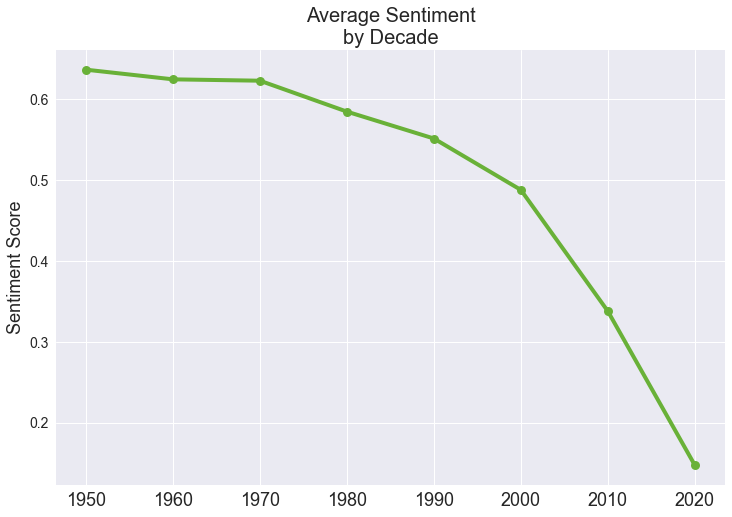

In [7]:
# create visualization using the sentiment_lineplot function found in final_explore.py 
explore.sentiment_lineplot(df)

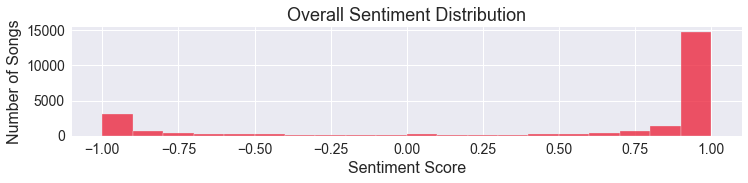

In [8]:
explore.sentiment_histplot(df)

#### ANSWER 1:
Sentiment was steady in the 1950's and 1960's, followed by a gradual **downward trend** through the 1970's and 1980's. The downward trend became **more sharp begining in the 1990's**. The 2000's and 2010's saw the most significant drop in sentiment. 

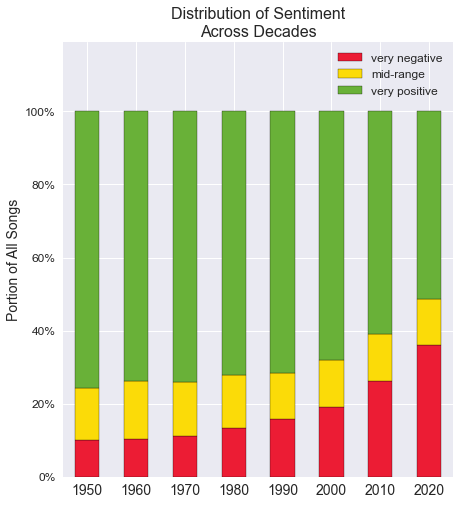

In [9]:
explore.sentiment_stacked_bar(df)

It appears that this decrease in the mean sentiment was a result of an increase in "very negative" sentiment, and a decrease in "very positive" sentiment, with relatively little change in the middle. 

#### QUESTION 2:
#### **What topics are most prevalent across the Billboard Hot 100?**

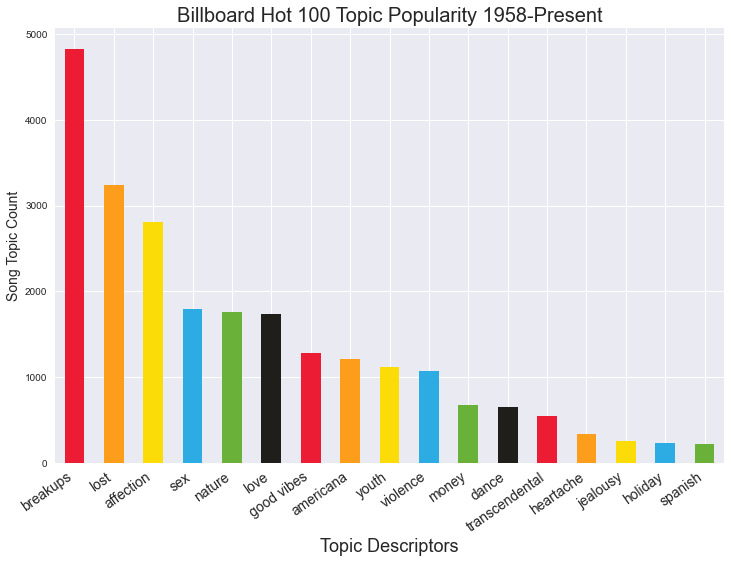

In [10]:
# create visualization using the topic_popularity function found in final_explore.py 
explore.topic_popularity(df)

#### ANSWER 2:
By count, **breakup references are the most frequently occurring topic** within the Billboard Top 100 Song catalog, with the topics of lost, affection, sex, and nature rounding out the top 5 most prevalent topics within the corpus. The 5 least prevalent topics are spanish, holiday, jealousy, heartache, and transcendental.

---

#### QUESTION 3: 
#### **How do topics within lyrics change over time?**

To answer this question we grouped topics that aligned to others in theme to evaluate changing trends. The first of the groups was labled **Relationship Topics** and the second, **Vice Topics**. We then explored each grouping.

<img src='topic_groupings.png' width="450"  align="center"/>



---

#### Q3A: How do **Relationship Topics** change over the decades?

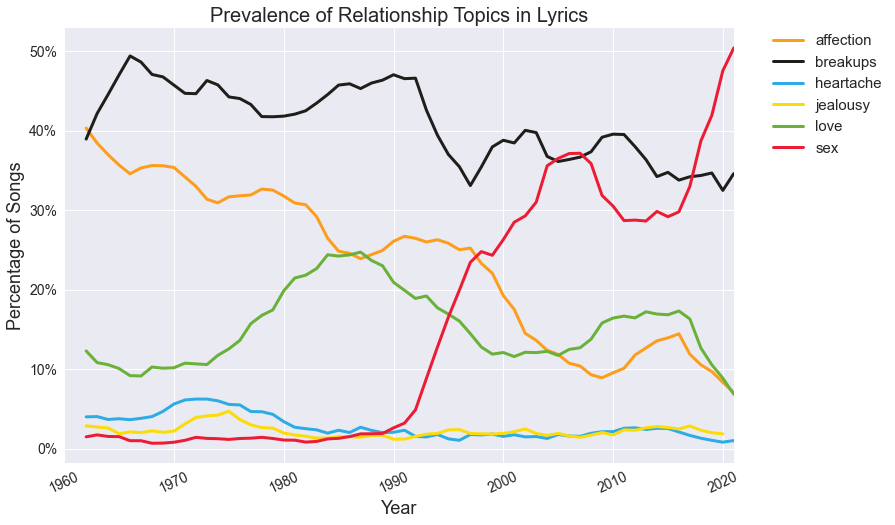

In [11]:
# create visualization using the relationship_line function found in final_explore.py 
explore.relationship_line(df)

**Answer:**
Within the **Relationship Topics** grouping, breakups, heartache, jealousy, and love stay somewhat consistent in prevalence within the lyrical corpus across the decades. Affection steadily decreases from being the 2nd most prevalent topic for 30 years, from the 1960's until the 1990's. **In the '90's the topic of sex suddenly rises** from the least prevalent to the second most prevalent topic, then overtakes breakups for the most prevalent topic around 2018. 

**Note**: For the purpose of this project the topic of sex is defined as more forward and explicit encounters with a partner while affection is more sensual encounters such as touching, hugging, or kissing.

Noticing the significant changes to the topics of Affection and Sex over time, a closer look was conducted.

---

#### Q3A: What is the relationship between Sex and Affection?

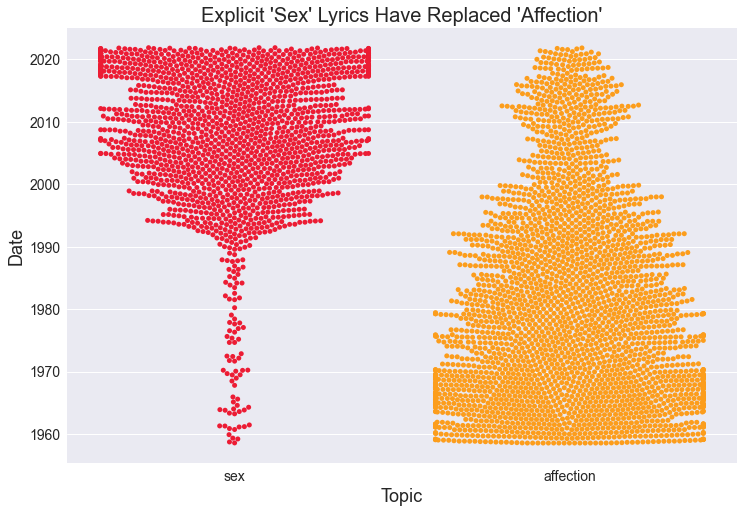

In [12]:
# create visualization using the touch_swarm function found in final_explore.py 
explore.touch_swarm(df)

**Observation:**
Sex and Affection have an **inverse relationship**, with the **shift occurring in the 1990's**. Affection was consistently represented across the lyrical corpus for nearly 40 years, from the late 1950's through the late '90's, while the topic of Sex exploded in usage in the early '90s. Shortly after the increased prevalence of the Sex topic, the affection topic declined in prevalence. 

#### Q3B: How do **Vice Topics** change over the decades?

#### ANSWER 3:
While most relationship topics appear constant, affection and sex have an inverse relationship.

---

#### QUESTION 4: 
**How do vice topics change over the decades?**

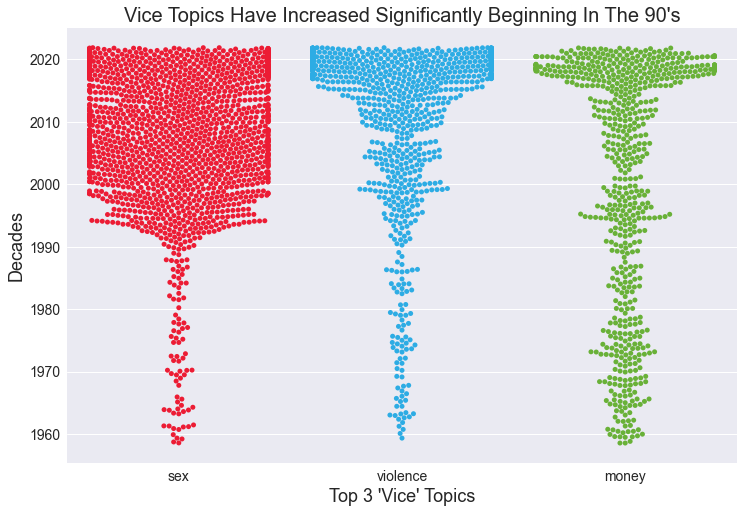

In [13]:
# create visualization using the vice_swarm function found in final_explore.py 
explore.vice_swarm(df)

In [14]:
#### Hypothesis Testing - 

#### ANSWER 4: 
After 1990 sex became extremely popular in lyrics, then around 2015 violence and money exploded as well.

---

#### QUESTION 5:
**How has the prevalence of the word 'like' changed over the decades?**

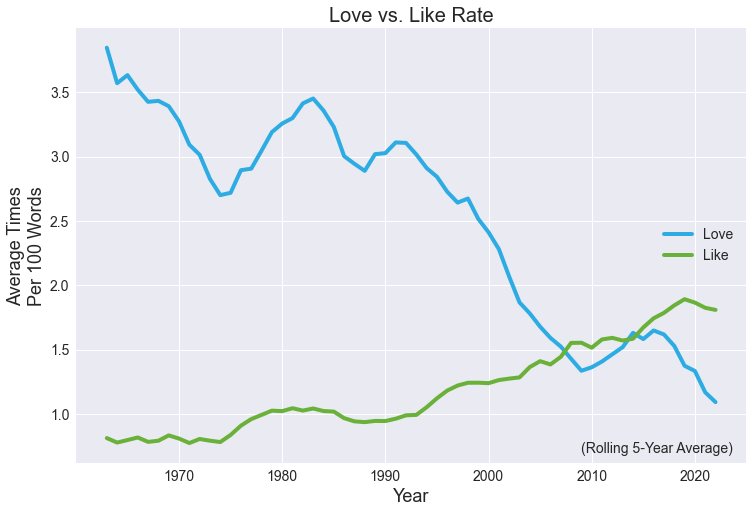

In [15]:
# create visualization using the love_vs_like_lineplot function found in final_explore.py 
explore.love_vs_like_lineplot(df)

In [16]:
# Hypothesis Testing - 

#### ANSWER 5: 
Love went from most common word in the early decades, to lower in the top 5, then out of the top 5 and replaced with like.

#### Question 6: 
How does sentiment align with historical events?

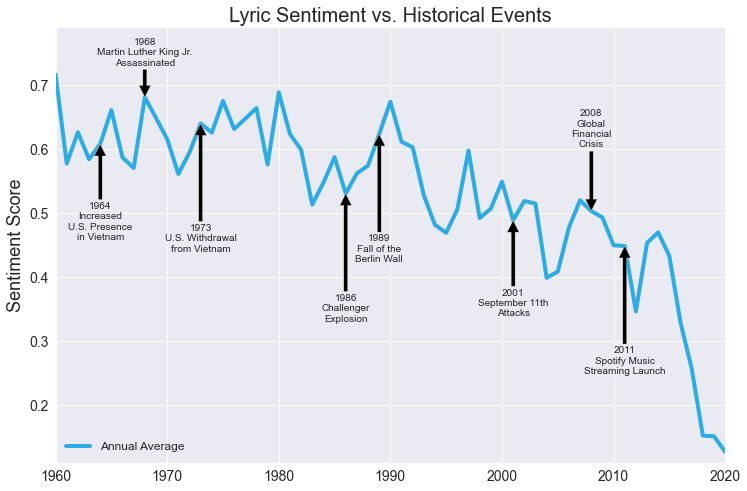

In [17]:
# create visualization using the historical_lineplot function found in final_explore.py 
explore.historical_lineplot(df)

#### Answer 6:

#### QUESTION 7:
#### **How did unique word count change over time?**

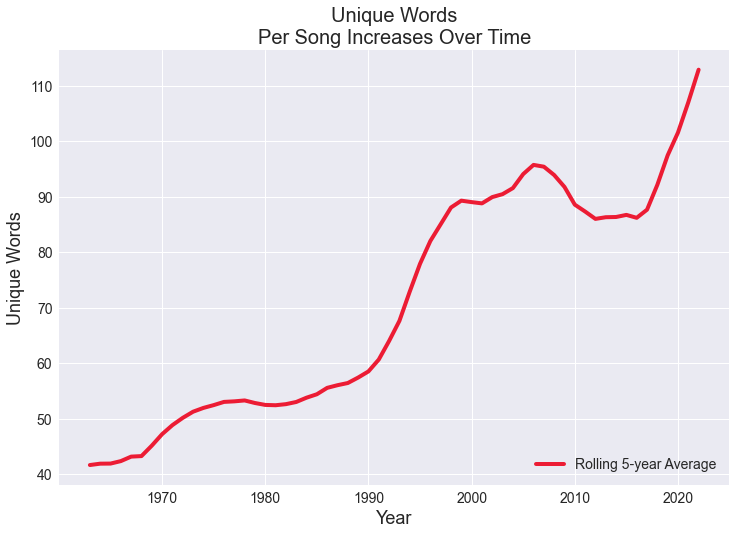

In [18]:
# create visualization using the unique_words_lineplot function found in final_explore.py 
explore.unique_words_lineplot(df)

#### ANSWER 7:

### EXPLORATION SUMMARY
Exploration revealed significant changes to sentiment and topic prevalence across the decades, indicating **a cultural shift starting in the 90's where:** 
- Overall sentiment decreased
- Lyrics became more complex
- Topics shifted towards Sex, Money & Violence
- And ‘Love’ was replaced with ‘Like’




This information was utilized going forward into modeling to adjust hyperparameters based upon impactful features, primarily _____________ ___________. ____________.

==================================================== Overview of Exploratory Questions & Answers ==================================================== 
- 1. **How does sentiment within lyrics change over time?**

Sentiment was fairly steady in the 1950's and 1960's, followed by a gradual **downward trend** through the 1970's and 1980's. The downward trend became **more sharp begining in the 1990's**. The 2000's and 2010's saw the most significant drop in sentiment. 

- 2. **What topics are most prevalent across the Billboard Hot 100?**

By count, **breakup references are the most frequently occurring topic** within the Billboard Top 100 Song catalog, with the topics of lost, affection, sex, and nature rounding out the top 5 most prevalent topics within the corpus. The 5 least prevalent topics are spanish, holiday, jealousy, heartache, and transcendental.


- 3. **How do topics within lyrics change over time?**
    - **Q3A: How do **Relationship Topics** change over the decades?**

Within the **Relationship Topics** grouping, breakups, heartache, jealousy, and love stay somewhat consistent in prevalence within the lyrical corpus across the decades. Affection steadily decreases from being the 2nd most prevalent topic for 30 years, from the 1960's until the 1990's. **In the '90's the topic of sex suddenly rises** from the least prevalent to the second most prevalent topic, then overtakes breakups for the most prevalent topic around 2018. 


    -**Q3B: What is the relationship between Sex and Affection?**

Sex and Affection have an **inverse relationship**, with the **shift occurring in the 1990's**. Affection was consistently represented across the lyrical corpus for nearly 40 years, from the late 1950's through the late '90's, while the topic of Sex exploded in usage in the early '90s. Shortly after the increased prevalence of the Sex topic, the affection topic declined in prevalence. 

    - **Q3C: How do **Vice Topics** change over the decades?**


- 4. How do topics within lyrics change over time?


- 5. Is there a correlation between topics and the time a song was popular?




==========================================================================================================================================================

## IV. MODEL

### DATA SPLIT

In [19]:
# import for split
from sklearn.model_selection import train_test_split

Following exploration, the data was split into train, validate, and test samples using:

- Random State: 42
- Test = 20% of the original dataset
- The remaining 80% of the dataset is divided between valiidate and train
    - Validate (.30*.80) = 24% of the original dataset
    - Train (.70*.80) = 56% of the original dataset
    
The split of this data can be replicated using the splitdata function saved within the prepare.py file inside the [Lyrical Evolution](https://github.com/CBRJ-Lyrical-Metrics/song-lyrics-capstone) repository on GitHub. 

In [20]:
# split the data into train, validate, and test using the split_data function found in the prepare.py
train, validate, test = prepare.split_data(df)
# obtain the number of rows and columns for the splits
train.shape, validate.shape, test.shape

((13306, 24), (5703, 24), (4753, 24))

In [21]:
# TF/IDF import
from sklearn.feature_extraction.text import TfidfVectorizer

### Focus of Model Metrics
The target variable, Decade, is a categorical variable, therefore classification machine learning algorithms were used to fit to the training corpus and the models were evaluated on the validate corpus. The metrics used for model evaluation was accuracy, due to the multi-class classification approach. In other words, the model was optimized for identifying true positives, false positive, true negatives, and false negatives, therefore we focused on creating a model with the highest accuracy score from train to validate. 

In [22]:
# get the data
df = prepare.get_data()
# remove incomplete decades (1950, 2020)
df = df[(df.decade != 1950) & (df.decade != 2020)]

Reading from csv...


### Set X & y
As mentioned above, two different approaches were taken to prepare the data for modeling. Feature engineering was done for exploratory analysis and even more for modeling. This however did not result in a significant improvement in the accuracy of the model. Therefore, the data was prepared for modeling by using TF-IDF vectorization which takes into account the word count in each song's lyrics vs word count in the entire corpus. Below is how this was performed:

In [23]:
# make vectorizer
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df["lyrics"])
y = df["decade"]

### Set Baseline
A baseline prediction was set by using the mode for decade. This gave us a baseline accuracy of 20.6%. We will evaluate the accuracy of our models in comparrison to that baseline.
### Condsider Feature Engineering
First lets look at the models with the lower accuracy, this is the df using feature engineering not including TF-IDF. 
The following were adjustable:
- scale or not scale
- use only unique bigrams as features or use all numeric features
### Observation of models with feature engineering:
The Logistic Regression Model that performed best had a c of 0.1 and solver of 'newton-cg', with train accuracy of 37% and validate accuracy of 36% performing 16% better than baseline with validate. It was then applied to the un-seen test data with an accuracy of 37%.



### Consider TF-IDF
#### The Type of Classification models built were 
- Decision Tree
- Random Forest
- Logistic Regression

The models were run with many trials, adjusting parameters and algorithms to find the best performing model.  

- All Logistic Regression models appeared to be overfit based upon their high performance on train accuracy compared to the significant drop off on validate accuracy.
    - This is in part due to the use of TF-IDF which analyzes each word in the train corpus and does not remove attributes.
- In general all models outperformed baseline, which had  21% accuracy on train and 21% accuracy on validate.
- The Logistic Regression Model that performed best had a c of 1000 and solver of 'lbfgs', with train accuracy of 98% and validate accuracy of 61% performing 19% better than baseline with validate. It was then applied to the un-seen test data with an accuracy of 56%.
---
### MODEL - DECISION TREE


In [24]:
# uncommit to run the following code
# results = model.run_decision_tree_models(df)
# results.drop(columns='test_accuracy').head(1) # show baseline

In [25]:
# uncommit to run the following code
# results.drop(columns='test_accuracy').sort_values('validate_accuracy', ascending=False).head(3)

The Decision Tree model that performed the best on train & validate set had max_depth of 10, with 41% accuracy on train, and 31% accuracy on validate, so that model will be isolated below in the event it is the best performing model to be applied to the test (unseen) dataset. 

---

### Model - RANDOM FOREST

In [26]:
# uncommit to run the following code
# results2 = model.run_random_forest_models(df)
# results2.drop(columns='test_accuracy').sort_values('validate_accuracy', ascending=False).head(3)

The Random Forest model that performed the best on train & validate set had max_depth of 100 and min_sample_leaf of 2, with 93%  accuracy on train, and 40% accuracy on validate, so that model will be isolated below in the event it is the best performing model to be applied to the test (unseen) dataset. 

---

### Model - LOGISTIC REGRESSION

In [27]:
# uncommit to run the following code
# results3 = model.run_logistic_reg_models(df)
# results3.drop(columns='test_accuracy').sort_values('validate_accuracy', ascending=False).head(3)

Evaluating the model with the validate data set was done in the function above for comparrison. The Logistic Regression Model that performed best had a c-statistic of 1000 with a train accuracy of 69% and validate accuracy of 45% performing 222% better than baseline on unseen (validate) data.

---

### Best Performing Model Applied to Test Data (Unseen Data)

In [28]:
# uncommit to run the following code
# results3.sort_values('validate_accuracy', ascending=False).head(1)


==========================================================================================================================================================

## V. CONCLUSION

This project aimed to investigate the patterns of Billboard Top 100 song lyrics across decades using Time Series Analysis and Natural Language Processing techniques including Topic Modeling and Sentiment Analysis.

Through exploration we identified **a cultural shift starting in the 90's where:** 
- Overall sentiment decreased
- Lyrics became more complex
- Topics shifted towards sex, money & violence
- And ‘Love’ was replaced with ‘Like’

Through modeling we were able to confirm our hypothesis that we could use the lyrics of the top songs of each decade to accurately predict the decade a song was on the Billboard Top 100. Although, certain decades were predicted more accurately than others. Our best performing models were based heavily on TF/IDF with the top performing model being a Logistic Regression model with an F-1 score that was 220% over baseline.

### RECOMMENDATIONS

There are many avenues of application for both the findings and the Machine Learning processes of this project. Some of the major applications being in the areas of Journalism, Business, Academics, and Politics.

**Journalism**
- Reporting on changing cultural trends within lyrics.
- Music production reporting tracking changes in lyrical content for further content creation.

**Business**
- Marketing Analysis for companies associated with the music industry.
- Developing inclusive HR policies in business that adapt to changing popular societal trends.
- Predicting changes to the general market based upon sentiment brought on by prominent events.


**Academics**
- Anthropologic and Sociologic academic analysis.
- Using the NLP modeling process to predict the date of historical texts. 
- Researching the sentiment of social media posts over time and evaluating the impact of generalized sentiment.


**Politics**
- Applying data insights for use in political agendas or legislation for or against identified societal trends. 
- Making better informed decisions related to censorship. 

### NEXT STEPS
Given more time, we would like to:

- Obtain correct lyrics for all of the songs, using additional search methods in the Genius API or alternative lyric API's. 
- Add features such as genre, song playback length, additional measures of complexity, multiple topics per song
- Use features of lyrics to predict the songs' chart performance.
- Compare sentiment in song lyrics to sentiment in other popular media, such as news, arts, and cultural articles.
- Analyze whether other art forms (film and literature, for example) have seen a similar rise in the same topics.
- Use Spotify's API to incorporate musical/audio features into the analysis. Spotify provides the following metrics:
    - Mood: Danceability, Valence, Energy, Tempo
    - Properties: Loudness, Speechiness, Instrumentalness
    - Context: Liveness, Acousticness
    - Segments, Tatums, Bars, Beats, Pitches, Timbre, and more
- Continue to iterate on the model for improved performance
    - for example: use automated features selection methods such as Recursive Feature Elimination or SelectKBest to determine the most effective features


==========================================================================================================================================================